In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from scipy.special import expit # for sigmoid. The expit function, also known as the logistic function, is defined as expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('gbm-data.csv').values # and convert to ndarray
X = data[:,1:] # all excepn first column
y = data[:,0]

In [62]:
te_1 = []
tr_1 = []
min_loss_train = []
min_loss_test = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)
n_iter = 250
#for lr in [1, 0.5, 0.3, 0.2, 0.1]:
#clf_1 = GradientBoostingClassifier(n_estimators=n_iter, verbose=True, learning_rate=lr, random_state=241)
clf_1 = GradientBoostingClassifier(n_estimators=n_iter, verbose=False, learning_rate=0.2, random_state=241)
clf_1.fit(X_train, y_train)
# variant № 2
for i, y_pred_tr_1 in enumerate(clf_1.staged_predict_proba(X_train)):
    tr_1.append(log_loss(y_train, y_pred_tr_1))
for i, y_pred_te_1 in enumerate(clf_1.staged_predict_proba(X_test)):
    te_1.append(log_loss(y_test, y_pred_te_1))
#min_loss_train, ind_min_loss_train = np.min(tr_1), np.argmin(tr_1)
min_loss_test, ind_min_loss_test = np.min(te_1), np.argmin(te_1)

    
# variant № 1 (not finished)
#for i, y_pred_tr_err in enumerate(clf.staged_decision_function(X_train)):
    #y_pred_tr = clf.staged_predict_proba(X_train)
    #print(i, expit(y_pred_tr_err))    
#for i, y_pred_te_err in enumerate(clf.staged_decision_function(X_test)):
    #print(i, expit(y_pred_te_err))    
#print(tr_1)
#print(te_1)

In [41]:
clf = RandomForestClassifier(n_estimators=(ind_min_loss_test+1), random_state=241)
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
score_RF = log_loss(y_test, clf_probs)

In [43]:
f= open("answers_13/1.txt","w+")
f.write(str('overfitting'))
f.close()

f= open("answers_13/2.txt","w+")
f.write(str(np.round(min_loss_test, decimals=2))+' '+str(ind_min_loss_test+1)) # for learning rate = 0.2
f.close()

f= open("answers_13/3.txt","w+")
f.write(str(np.round(score_RF, decimals=2))) # for Random Forest
f.close()

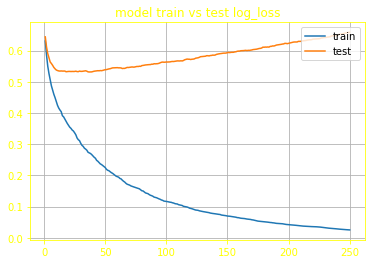

In [54]:
plt.title('model train vs test log_loss', color='yellow')
plt.rc('axes',edgecolor='yellow')
plt.rcParams['xtick.color'] = 'yellow'
plt.rcParams['ytick.color'] = 'yellow'
#plt.plot(np.arange(1,51),cv_results.mean_test_score,linestyle='', marker='o') # for dot
plt.plot(np.arange(1,n_iter+1),tr_1) # for line
plt.plot(np.arange(1,n_iter+1),te_1) # for line
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)

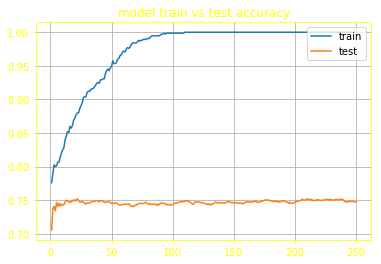

In [69]:
# for check (accuracy):

tr_2 = []
te_2 = []
for i, y_pred_tr_2 in enumerate(clf_1.staged_predict(X_train)):
    tr_2.append(accuracy_score(y_train, y_pred_tr_2))
    
for i, y_pred_te_2 in enumerate(clf_1.staged_predict(X_test)):
    te_2.append(accuracy_score(y_test, y_pred_te_2))


plt.title('model train vs test accuracy', color='yellow')
plt.rc('axes',edgecolor='yellow')
plt.rcParams['xtick.color'] = 'yellow'
plt.rcParams['ytick.color'] = 'yellow'
plt.plot(np.arange(1,n_iter+1),tr_2) # for line
plt.plot(np.arange(1,n_iter+1),te_2) # for line
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)

0.7477507497500833